In [1]:
import pandas as pd

test_data = pd.read_csv('toxicity-main\\toxicity-main\\toxicity_en.csv')

test_data.head()

,text,is_toxic
0,"Elon Musk is a piece of shit, greedy capitalis...",Toxic
1,The senile credit card shrill from Delaware ne...,Toxic
2,He does that a lot -- makes everyone look good...,Toxic
3,F*ck Lizzo,Toxic
4,Epstein and trump were best buds!!! Pedophiles...,Toxic


In [2]:
test_data['is_toxic'].value_counts()

is_toxic
Toxic        501
Not Toxic    499
Name: count, dtype: int64

In [3]:
## Check lenght of text in the data
test_data['text'].apply(lambda x:len(str(x).split())).max()

349

In [3]:
import numpy as np
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import TextVectorization
import json
import nltk
from Support import TextPreprocessing

class_labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# load model
TextClassifier = load_model('trial1.h5')
# Load the vectorizer configuration
with open('vectorizer_config.json', 'r') as f:
    vectorizer_config = json.load(f)

# Create a new vectorizer using the loaded configuration
vectorizer = TextVectorization.from_config(vectorizer_config)

# Load the vocabulary
vocabulary = []
with open('vocabulary.txt', 'r',encoding="utf8") as f:
    for line in f:
        word = line.strip()
        vocabulary.append(word)

# Adapt the vectorizer to the loaded vocabulary
vectorizer.set_vocabulary(vocabulary)
# Create a preprocessor object
preprocessor = TextPreprocessing()

def Get_prediction(text):
    user_input = preprocessor.preprocess_text(text)
    user_input=' '.join(user_input)
    # print(user_input)
    vectorized_text = vectorizer(user_input)
    # print(vectorized_text)
    prediction = TextClassifier.predict(np.expand_dims(vectorized_text,0))
    # Convert the prediction probabilities to binary form
    binary_predictions = np.where(prediction > 0.5, 1, 0)
    predicted_classes = [class_labels[i] for i, pred in enumerate(binary_predictions[0]) if pred == 1]
    return predicted_classes


In [4]:
def Get_prediction(text):
    user_input = preprocessor.preprocess_text(text)
    user_input=' '.join(user_input)
    # print(user_input)
    vectorized_text = vectorizer(user_input)
    # print(vectorized_text)
    prediction = TextClassifier.predict(np.expand_dims(vectorized_text,0))
    # Convert the prediction probabilities to binary form
    binary_predictions = np.where(prediction > 0.5, 1, 0)
    predicted_classes = [class_labels[i] for i, pred in enumerate(binary_predictions[0]) if pred == 1]
    return predicted_classes

In [14]:
# write a function that iterate through test data and get prediction and store it in a dataframe
def get_prediction_df(data):
    predicted_classes = []
    for i in range(len(data)):
        predicted_classes.append(Get_prediction(data['text'][i]))
    return predicted_classes

# get prediction
predicted_classes = get_prediction_df(test_data)



1/1 [==============================] - 0s 94ms/step


In [16]:
# convert prediction into Toxic and Not Toxic
def convert_toxic_not_toxic(predicted_classes):
    toxic_not_toxic = []
    for i in range(len(predicted_classes)):
        if len(predicted_classes[i]) > 0:
            toxic_not_toxic.append('Toxic')
        else:
            toxic_not_toxic.append('Not Toxic')
    return toxic_not_toxic

# get toxic not toxic
toxic_not_toxic = convert_toxic_not_toxic(predicted_classes)


In [18]:
# create a dataframe
final_df = pd.DataFrame({'text':test_data['text'],'Actual':test_data['is_toxic'],'Prediction':toxic_not_toxic})
final_df.head()

,text,Actual,Prediction
0,"Elon Musk is a piece of shit, greedy capitalis...",Toxic,Toxic
1,The senile credit card shrill from Delaware ne...,Toxic,Not Toxic
2,He does that a lot -- makes everyone look good...,Toxic,Toxic
3,F*ck Lizzo,Toxic,Toxic
4,Epstein and trump were best buds!!! Pedophiles...,Toxic,Not Toxic


In [21]:
!pip install scikit-learn
!pip install seaborn

                                              0.0/9.2 MB ? eta -:--:--
                                              0.0/9.2 MB ? eta -:--:--
                                              0.1/9.2 MB 1.4 MB/s eta 0:00:07
                                              0.2/9.2 MB 1.4 MB/s eta 0:00:07
     -                                        0.4/9.2 MB 1.8 MB/s eta 0:00:06
     --                                       0.5/9.2 MB 2.0 MB/s eta 0:00:05
     --                                       0.7/9.2 MB 2.1 MB/s eta 0:00:05
     ---                                      0.7/9.2 MB 2.1 MB/s eta 0:00:05
     ---                                      0.7/9.2 MB 2.1 MB/s eta 0:00:05
     ---                                      0.8/9.2 MB 2.0 MB/s eta 0:00:05
     ---                                      0.8/9.2 MB 2.0 MB/s eta 0:00:05
     ----                                     1.0/9.2 MB 1.8 MB/s eta 0:00:05
     -----                                    1.2/9.2 MB 2.0 MB/s eta 0:00:05


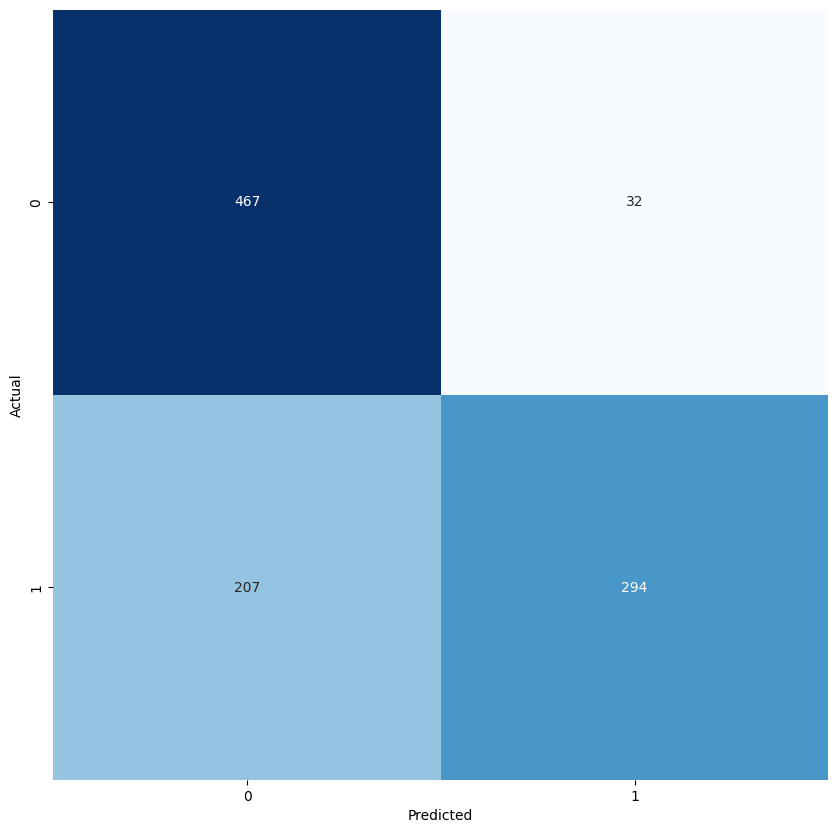

In [22]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(final_df['Actual'], final_df['Prediction'])
# 0 - Not Toxic and 1 - Toxic
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# plot bar chart with comparison of actual and predicted classes


In [23]:
# make classifcation report
from sklearn.metrics import classification_report

print(classification_report(final_df['Actual'], final_df['Prediction']))

              precision    recall  f1-score   support

   Not Toxic       0.69      0.94      0.80       499
       Toxic       0.90      0.59      0.71       501

    accuracy                           0.76      1000
   macro avg       0.80      0.76      0.75      1000
weighted avg       0.80      0.76      0.75      1000

